In [5]:
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import (
    models,
    layers,
) 
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [6]:
cifar_10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
    }

model_directory = 'models'

In [7]:
class RandomIntegers():
    def __init__(self):
        pass
    
    def generate(self, n, length):
        # Generate n unique random integers between 0 and length
        random_integers = random.sample(range(length), n)
        
        return random_integers

#### CIFAR-10
###### CIFAR-10 dataset consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [8]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

### Plot dataset

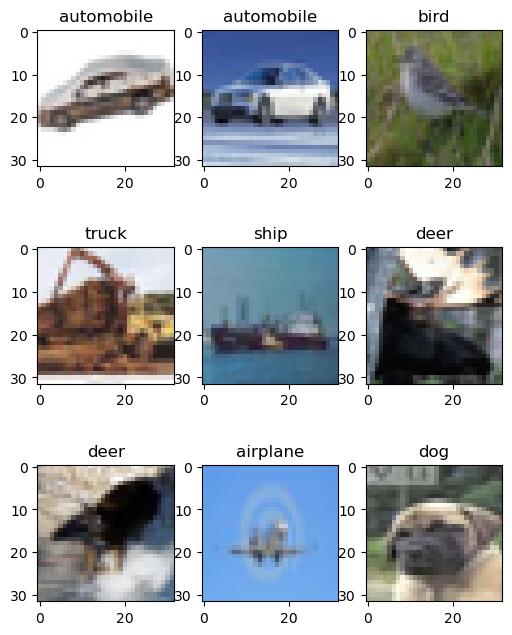

In [9]:
def display_images():
    random_integers = RandomIntegers().generate(9, len(x_train))
    plt.figure(figsize=(6, 8))
    counter = 0
    for i in random_integers:
        # define subplot
        plt.subplot(330 + 1 + counter)
        counter += 1
        # plot raw pixel data
        plt.imshow(x_train[i])
        plt.title(cifar_10_labels[y_train[i][0]])
    # show the figure
    plt.show()
display_images()

### Xavier Initialization

Weight initialization is used to define the initial values for the parameters in neural network models prior to training the models on a dataset. 

Neural networks are trained using optimizers such as Gradient Descent, Adam etc that incrementally changes the network weights to minimize the loss funciton. The optimization algorithms requires a starting point in the space of possible weights to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.

The xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(1/sqrt(n)) and 1/sqrt(n), where n is the number of inputs to the node.

### Build Model

In [11]:
model = tensorflow.keras.models.Sequential([
    
    tensorflow.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tensorflow.keras.layers.Dense(128, 
                                  activation='relu', 
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 ),
    # tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10, 
                                  activation='softmax',
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 )
])

### Compiling the model

In [12]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

#### Model Training

In [13]:
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/25


/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 [==============================] - 3s 12ms/step - loss: 2.5104 - sparse_categorical_accuracy: 0.2191 - val_loss: 2.0158 - val_sparse_categorical_accuracy: 0.2695
Epoch 2/25
98/98 [==============================] - 1s 7ms/step - loss: 1.9925 - sparse_categorical_accuracy: 0.2828 - val_loss: 1.9714 - val_sparse_categorical_accuracy: 0.2770
Epoch 3/25
98/98 [==============================] - 1s 7ms/step - loss: 1.9341 - sparse_categorical_accuracy: 0.3078 - val_loss: 1.9341 - val_sparse_categorical_accuracy: 0.3067
Epoch 4/25
98/98 [==============================] - 1s 7ms/step - loss: 1.8934 - sparse_categorical_accuracy: 0.3283 - val_loss: 1.9260 - val_sparse_categorical_accuracy: 0.3091
Epoch 5/25
98/98 [==============================] - 1s 7ms/step - loss: 1.8634 - sparse_categorical_accuracy: 0.3421 - val_loss: 1.8516 - val_sparse_categorical_accuracy: 0.3447
Epoch 6/25
98/98 [==============================] - 1s 7ms/step - loss: 1.8525 - sparse_categorical_accuracy: 0.3495 - v

#### Plot Accuracy

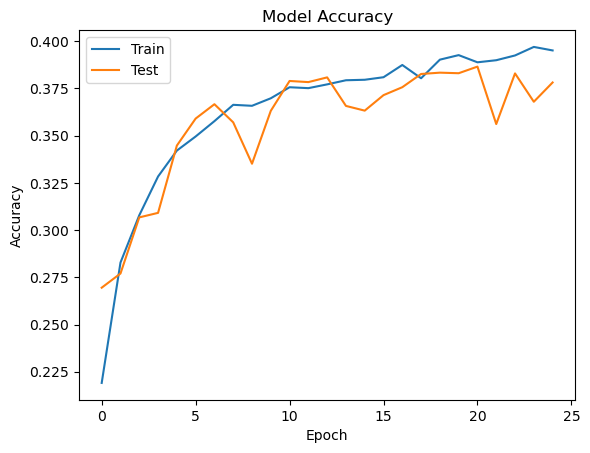

In [14]:
# Plot the accuracy from the training history
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

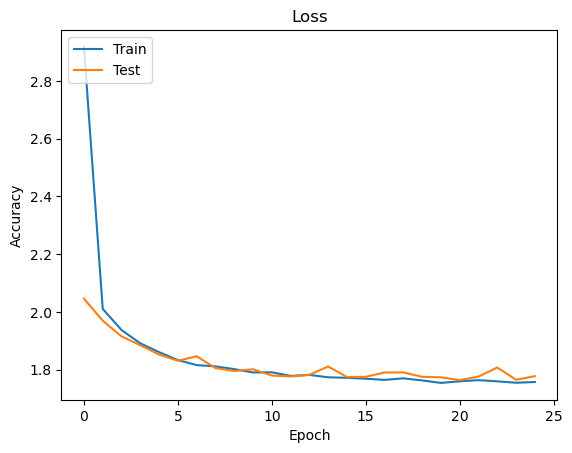

In [26]:
# Plot the accuracy from the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Save model

In [38]:
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory,"model_nn.h5")
model.save(model_path)

#### Load Model

In [41]:
# Load the saved model from a file
loaded_model = tf.keras.models.load_model(model_path)
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Predict

In [44]:
# Get the true labels and predicted labels for the test dataset
true_labels = np.concatenate([y for x, y in zip(x_test,y_test)], axis=0)
predicted_labels = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 1s 1ms/step


#### Confusion Matrix

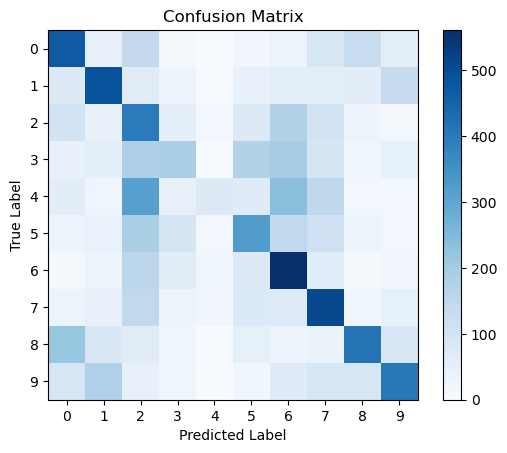

In [56]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

#### Classification Report

In [54]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=cifar_10_labels.values(),)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    airplane       0.42      0.47      0.44      1000
  automobile       0.48      0.49      0.48      1000
        bird       0.23      0.40      0.30      1000
         cat       0.34      0.19      0.24      1000
        deer       0.49      0.07      0.13      1000
         dog       0.35      0.32      0.34      1000
        frog       0.36      0.56      0.44      1000
       horse       0.39      0.51      0.44      1000
        ship       0.50      0.41      0.45      1000
       truck       0.48      0.40      0.44      1000

    accuracy                           0.38     10000
   macro avg       0.40      0.38      0.37     10000
weighted avg       0.40      0.38      0.37     10000



#### In multi-class classification problems, macro-average and micro-average are two commonly used methods to calculate precision, recall, and accuracy.

Micro-average calculates the metrics globally by counting the total true positives, false negatives, and false positives across all classes. Micro-average is useful when you want to weight each instance or prediction equally, regardless of the class.

Macro-average calculates the metrics for each class separately and then takes the average across all classes. Macro-average is useful when you want to weight each class equally, regardless of the number of instances or predictions in each class.

Here's a brief explanation of the differences between micro-average and macro-average for precision, recall, and accuracy:
Micro-average precision, recall, and accuracy are calculated by counting the total true positives, false negatives, and false positives across all classes and then calculating the precision, recall, and accuracy from those counts. Micro-average gives equal weight to each instance or prediction, regardless of the class.

* Macro-average precision, recall, and accuracy are calculated by calculating the precision, recall, and accuracy for each class separately and then taking the average across all classes.
* Macro-average gives equal weight to each class, regardless of the number of instances or predictions in each class.

